In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")
print('done')

done


In [2]:
%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/
%ls

/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs
default_noparameterization/       Malte_EBTpower2_0.33deg_tuning2/
Malte_EBTpower2_0.25deg/          Malte_EBTpower2_0.33deg_tuning3/
Malte_EBTpower2_0.25deg_tuning1/  Malte_EBTpower2_0.33deg_tuning4/
Malte_EBTpower2_0.25deg_tuning2/  Malte_EBTpower2_0.33deg_tuning5/
Malte_EBTpower2_0.25deg_tuning3/  Malte_EBTpower2_0.5deg/
Malte_EBTpower2_0.25deg_tuning4/  Malte_EBTpower2_0.67deg/
Malte_EBTpower2_0.25deg_tuning5/  Malte_EBTpower2_1deg/
Malte_EBTpower2_0.25deg_tuning6/  Quarterdeg_sanitycheck/
Malte_EBTpower2_0.25deg_tuning7/  Sanity_check_0.5deg/
Malte_EBTpower2_0.33deg/          Scott_EBTpower4_0.5deg/
Malte_EBTpower2_0.33deg_tuning1/


In [3]:
## Scale awareness tests:
##Unparameterized run
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs1 = xr.open_dataset('static.nc', decode_times=False)
os1 = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)


%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default/
fsGMBS3 = xr.open_dataset('static.nc', decode_times=False)
osGMBS3 = xr.open_dataset('ocean.stats.nc', decode_times=False)


#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fshr = xr.open_dataset('static.nc', decode_times=False)
oshr = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc',
                        'sub09/ocean.stats.nc','sub10/ocean.stats.nc','sub11/ocean.stats.nc','sub12/ocean.stats.nc',
                        'sub13/ocean.stats.nc','sub14/ocean.stats.nc','sub15/ocean.stats.nc','sub16/ocean.stats.nc',
                        'sub17/ocean.stats.nc','sub18/ocean.stats.nc','sub19/ocean.stats.nc','sub20/ocean.stats.nc'], decode_times=False)



%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Malte_EBTpower2_0.5deg/
fsF0 = xr.open_dataset('static.nc', decode_times=False)
osF0 = xr.open_dataset('ocean.stats.nc', decode_times=False)
%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Scott_EBTpower4_0.5deg/
fsF1 = xr.open_dataset('static.nc', decode_times=False)
osF1 = xr.open_dataset('ocean.stats.nc', decode_times=False)


%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.25deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Malte_EBTpower2_0.5deg
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Finalized_Runs/Scott_EBTpower4_0.5deg
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [4]:
np.nanmean(oshr.APE.sum(axis=1)[-100:])

9.612769161724109e+19

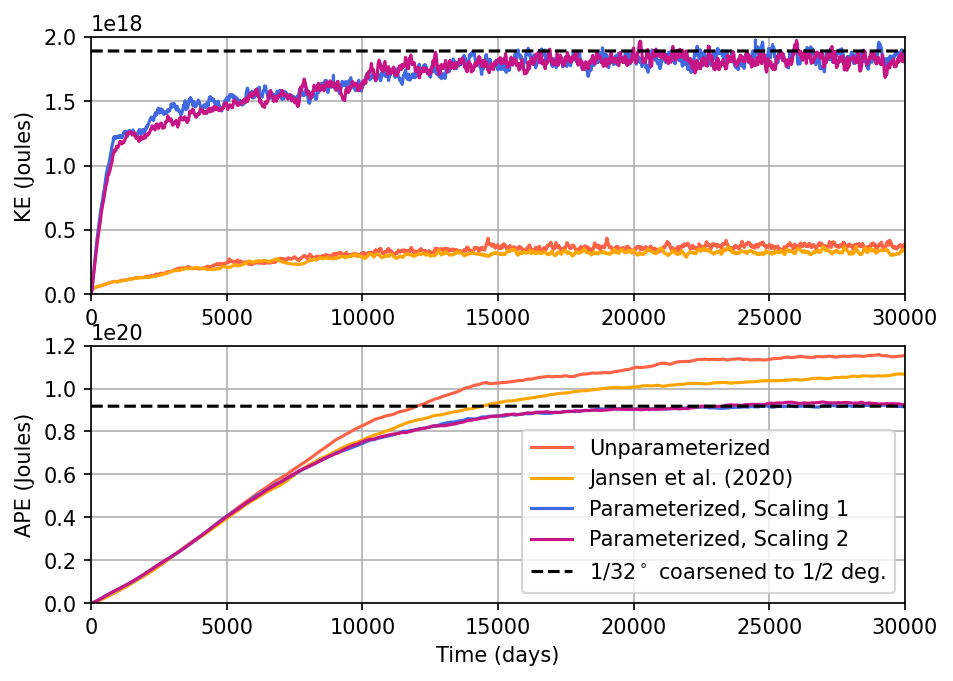

In [9]:
plt.figure(figsize=(7,5),dpi=150)
plt.subplot(2,1,1)
#plt.title('1/4 degree runs')

plt.plot(os.Time,os.KE.sum(axis=1),label='Unparameterized',color='tomato'); 
plt.plot(osGMBS3.Time,osGMBS3.KE.sum(axis=1),label='Jansen et al. (2020)',color='orange'); 
plt.plot(osF0.Time,osF0.KE.sum(axis=1),label='Parameterized, Scaling 1',color='royalblue'); 
plt.plot(osF1.Time,osF1.KE.sum(axis=1),label='Parameterized, Scaling 2',color='mediumvioletred'); 

plt.plot(os.Time,os.Time*0+1.89e18,'--',label='1/32$^\circ$ coarsened to 1/2 deg.',color='k')


plt.ylabel('KE (Joules)')
plt.grid('on')
# plt.xlim([0,30])
# plt.ylim([.02,.05e18])
plt.xlim([0,30000])
plt.ylim([0,2.e18])
#plt.legend()
#plt.title('KE Timeseries')
plt.subplot(2,1,2)


plt.plot(os.Time,os.APE.sum(axis=1),label='Unparameterized',color='tomato'); 
plt.plot(osGMBS3.Time,osGMBS3.APE.sum(axis=1),label='Jansen et al. (2020)',color='orange'); 
plt.plot(osF0.Time,osF0.APE.sum(axis=1),label='Parameterized, Scaling 1',color='royalblue'); 
plt.plot(osF1.Time,osF1.APE.sum(axis=1),label='Parameterized, Scaling 2',color='mediumvioletred'); 

plt.plot(os.Time,os.Time*0+9.18e19,'--',label='1/32$^\circ$ coarsened to 1/2 deg.',color='k')


plt.grid('on')
# plt.xlim([0,30])
# plt.ylim([0,.0012e20])
plt.xlim([0,30000])
plt.ylim([0.e20,1.2e20])

#plt.title('APE Timeseries')
plt.ylabel('APE (Joules)')
plt.xlabel('Time (days)')
plt.legend(fontsize=10)
#plt.legend(bbox_to_anchor =(1., 1.),fontsize=7)